<a href="https://colab.research.google.com/github/JayellWolfe/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Jessica_Williams_LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
import numpy as np
dir(np.random)

['Lock',
 'RandomState',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'beta',
 'binomial',
 'bytes',
 'chisquare',
 'choice',
 'dirichlet',
 'division',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'np',
 'operator',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'print_function',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_state',
 'shuffle',
 'standard_cauchy',
 'standard_exponential',
 'standard_gamma',
 'standard_normal',
 'standard_t',
 'test',
 'triangular',
 'uniform',
 'vonmises',
 'wald',
 'warnings',
 'weibull',
 'zipf']

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(2500):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(7500):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users)

[User(purchased=True, time_on_site=266.8654537331361, mobile=True), User(purchased=False, time_on_site=178.91563119307384, mobile=True), User(purchased=True, time_on_site=363.8169189256585, mobile=False), User(purchased=False, time_on_site=36.590337131782675, mobile=True), User(purchased=True, time_on_site=231.9934724868825, mobile=True), User(purchased=False, time_on_site=20.852032518084364, mobile=True), User(purchased=True, time_on_site=216.2363984035228, mobile=True), User(purchased=False, time_on_site=60.31639040722713, mobile=True), User(purchased=True, time_on_site=586.3802932220395, mobile=False), User(purchased=False, time_on_site=21.969887933673355, mobile=True), User(purchased=False, time_on_site=130.9424044245344, mobile=False), User(purchased=True, time_on_site=163.49432237117784, mobile=True), User(purchased=True, time_on_site=28.82243300275213, mobile=True), User(purchased=True, time_on_site=277.719671665317, mobile=True), User(purchased=False, time_on_site=11.4894181490

In [0]:
!pip freeze

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.1.0
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autograd==1.2
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.180
botocore==1.12.180
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.10
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.0
distributed==1.25.3
Django==2.2.2
dlib==19.16.0
dm-sonnet==1.33
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easy

In [0]:
!pip install pandas==0.23.4

In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,True,266.865454,True
1,False,178.915631,True
2,True,363.816919,False
3,False,36.590337,True
4,True,231.993472,True


In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.003751350854635,5.009398928585617,5.243678463251709,5.299144569242229,5.335808727898622,5.354058941929808,5.356655756793726,5.37517035089916,5.4224141352074104,5.422816345314735,5.475777997861815,5.4826667302607035,5.505182450218523,5.522506316803278,5.536619984767984,5.59161055878466,5.597709910181662,5.650945129509543,5.750021119970238,5.754121440983876,5.794426630402953,5.879330846284269,5.93625857839439,6.027549105672513,6.032083635203434,6.058754606407653,6.077924067273132,6.1119234145902475,6.120655137922155,6.170935096901987,6.195123509039309,6.2618073064129165,6.26225023224459,6.325232576712082,6.329069057522773,6.418321385501438,6.4680237572304105,6.477835349152928,6.527510569675307,6.598078778230212,...,589.9467570001129,590.1353814546219,590.152636709826,590.2285374736751,590.3384383624849,590.8642119552597,591.0420908238036,591.170038142589,591.215753487484,591.2214013482399,591.2263695870531,591.4267748173844,592.8652893128263,592.9586343680148,593.043750873348,593.1460729019625,594.0639143810898,594.0661521844502,594.2679457167782,594.4400795249147,594.6069662061743,594.8412787807033,595.2333068181255,595.4773647202525,595.6943379773468,595.8325898240622,595.8622011216319,595.971385574021,596.8316905382894,596.8902662794296,596.9090241869355,597.6454260262166,597.7918321816657,598.0956982179121,598.2477713013799,598.4374831982028,598.9994051862587,599.1449493345964,599.2733088754288,599.897622427057
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,0,1,1,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,...,1,1,1,0,0,1,1,0,1,0,1,0,1,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,1
True,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,0,0,1,1,1,0,1,1,1,0,0,0


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 6)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.409, 104.153]","(104.153, 203.302]","(203.302, 302.451]","(302.451, 401.6]","(401.6, 500.749]","(500.749, 599.898]"
purchased,,,,,,
False,2013,1913,1601,289,269,204
True,903,1058,1281,137,150,182


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.409, 104.153]","(104.153, 203.302]","(203.302, 302.451]","(302.451, 401.6]","(401.6, 500.749]","(500.749, 599.898]"
purchased,,,,,,
False,0.690329,0.643891,0.555517,0.678404,0.642005,0.528497
True,0.309671,0.356109,0.444483,0.321596,0.357995,0.471503


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.7132,0.6008
True,0.2868,0.3992


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

ct = pd.crosstab(user_data['mobile'], [user_data['purchased'], time_bins], normalize='index')
ct

purchased               False        ...                      True 
time_on_site (4.409, 104.153]        ...         (500.749, 599.898]
mobile                               ...                           
False                  0.1356        ...                     0.0728
True                   0.2232        ...                     0.0000

[2 rows x 12 columns]

In [0]:
type(ct)

pandas.core.frame.DataFrame

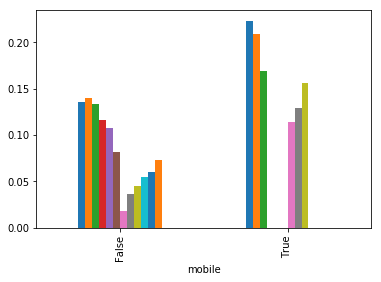

In [0]:
ct.plot(kind='bar', legend=False);

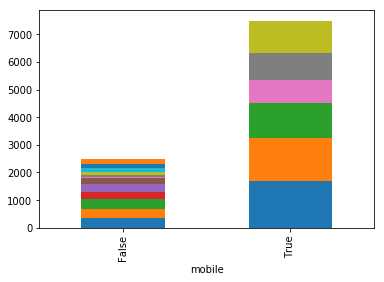

In [0]:
ct = pd.crosstab(user_data['mobile'], [user_data['purchased'], time_bins])

ct.plot(kind='bar', stacked=True, legend=False);

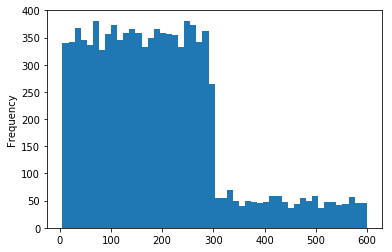

In [0]:
user_data['time_on_site'].plot.hist(bins=50);

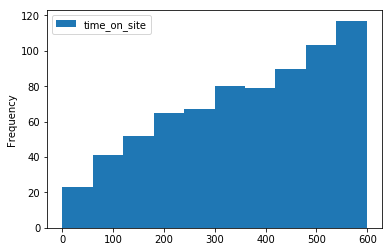

In [0]:
user_data[(user_data['mobile']==False) & (user_data['purchased']==True)].plot.hist()

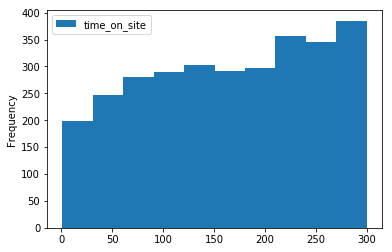

In [0]:
user_data[(user_data['mobile']==True) & (user_data['purchased']==True)].plot.hist()

In [0]:
pt = pd.pivot_table(user_data, values='purchased', index=time_bins)
pt

,purchased
time_on_site,
"(4.409, 104.153]",0.309671
"(104.153, 203.302]",0.356109
"(203.302, 302.451]",0.444483
"(302.451, 401.6]",0.321596
"(401.6, 500.749]",0.357995
"(500.749, 599.898]",0.471503


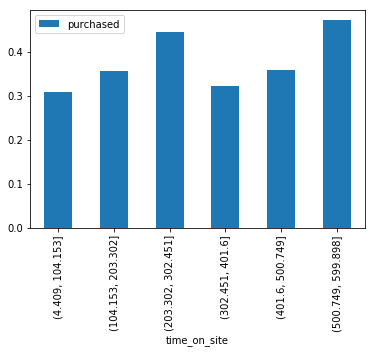

In [0]:
pt.plot.bar()

In [0]:
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']],
                 normalize='columns')
ct

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(4.409, 104.153]    0.190129  0.371505  0.064156  0.286239
(104.153, 203.302]  0.196298  0.346871  0.126918  0.322979
(203.302, 302.451]  0.186203  0.281625  0.154812  0.390782
(302.451, 401.6]    0.162086  0.000000  0.191074  0.000000
(401.6, 500.749]    0.150869  0.000000  0.209205  0.000000
(500.749, 599.898]  0.114414  0.000000  0.253835  0.000000

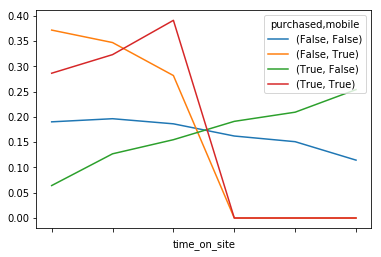

In [0]:
ct.plot();

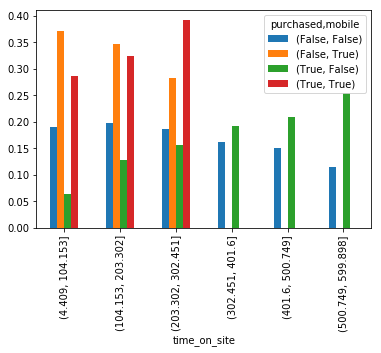

In [0]:
ct.plot(kind='bar');

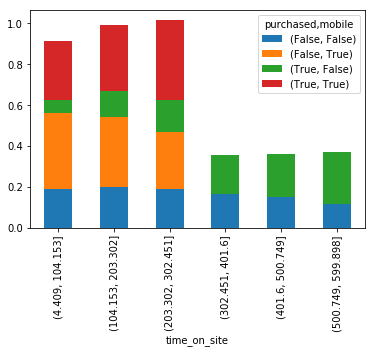

In [0]:
ct.plot(kind='bar', stacked=True);

In [0]:
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']],
                 normalize='columns')
ct

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(4.409, 104.153]    0.190129  0.371505  0.064156  0.286239
(104.153, 203.302]  0.196298  0.346871  0.126918  0.322979
(203.302, 302.451]  0.186203  0.281625  0.154812  0.390782
(302.451, 401.6]    0.162086  0.000000  0.191074  0.000000
(401.6, 500.749]    0.150869  0.000000  0.209205  0.000000
(500.749, 599.898]  0.114414  0.000000  0.253835  0.000000

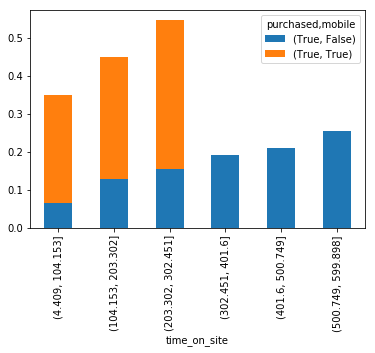

In [0]:
ct_sliced = ct.iloc[:, [2,3]]

ct_sliced.plot(kind='bar', stacked=True);

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [104]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [138]:
age_groups = pd.cut(df['age'],6, precision=0)# 5 equal-sized bins
weight_groups = pd.cut(df['weight'], 5, precision=0)
exercise_groups = pd.cut(df['exercise_time'], 5, precision=0)
pd.crosstab([age_groups,weight_groups],exercise_groups, rownames= ['Age(years)', 'Weight (lbs)'], colnames = ["Exercise_Times"])

Exercise_Times               (-0.0, 60.0]       ...        (240.0, 300.0]
Age(years)   Weight (lbs)                       ...                      
(18.0, 28.0] (100.0, 129.0]             8       ...                    23
             (129.0, 158.0]             3       ...                    11
             (158.0, 188.0]             6       ...                     2
             (188.0, 217.0]            13       ...                     0
             (217.0, 246.0]             7       ...                     0
(28.0, 39.0] (100.0, 129.0]             9       ...                    21
             (129.0, 158.0]            11       ...                    19
             (158.0, 188.0]            12       ...                     2
             (188.0, 217.0]            16       ...                     0
             (217.0, 246.0]             5       ...                     0
(39.0, 49.0] (100.0, 129.0]             3       ...                    34
             (129.0, 158.0]             8       ...                    18
             (158.0, 188.0]             7       ...                     5
             (188.0, 217.0]            10       ...                     0
             (217.0, 246.0]             8       ...                     0
(49.0, 59.0] (100.0, 129.0]             8       ...                    26
             (129.0, 158.0]             3       ...                    22
             (158.0, 188.0]             9       ...                     1
             (188.0, 217.0]             8       ...                     0
             (217.0, 246.0]             1       ...                     0
(59.0, 70.0] (100.0, 129.0]             6       ...                     3
             (129.0, 158.0]             7       ...                     4
             (158.0, 188.0]             9       ...                     0
             (188.0, 217.0]            15       ...                     0
             (217.0, 246.0]             9       ...                     0
(70.0, 80.0] (100.0, 129.0]            19       ...                     0
             (129.0, 158.0]            12       ...                     0
             (158.0, 188.0]            18       ...                     0
             (188.0, 217.0]            14       ...                     0
             (217.0, 246.0]            14       ...                     0

[30 rows x 5 columns]

In [106]:
df.dtypes

age              int64
weight           int64
exercise_time    int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5a9c4c668>,
      dtype=object)

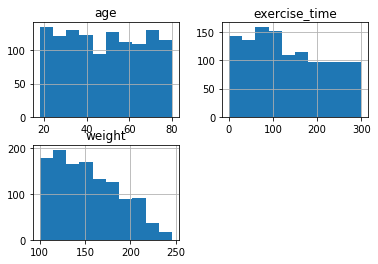

In [107]:
df.hist()

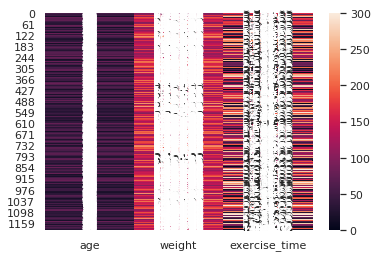

In [121]:
import seaborn as sns
sns.heatmap(df, annot=True)


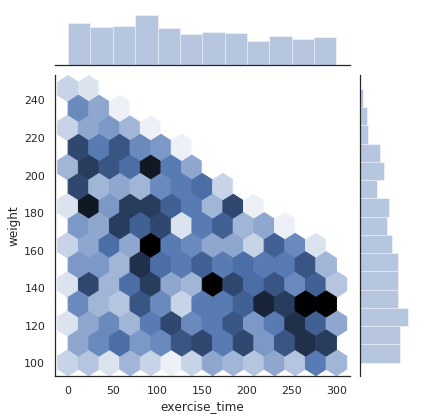

In [127]:
import seaborn as sns; 
sns.set(style="white", color_codes=True)

g = sns.jointplot(x='exercise_time', 
y='weight', data=df, kind='hex')


In [0]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


In [0]:
#1 the variable are age, weight, and exercise times the types are integers
#2 weight and exercise times appear to be closely related and effected by one another, between age and weight there doesn't seem to be much relation,
# age and exercise time also seem to be related.
#3 age to weight was the relationship i feel is the spurious variable in this dataset

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)